<a href="https://colab.research.google.com/github/bieri2/relampago/blob/main/marcos_juarez_fluxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np          
import matplotlib.pyplot as plt
import pandas as pd
import os
import xarray as xr

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
R  = 287.0                                  # Define constants
cp = 1005.0
l  = 2.45e6

In [54]:
path = '/content/drive/My Drive/relampago/'        # Path to RELAMPAGO files for EOL sites

files = os.listdir(path)                           # List files
files = sorted(files)                              # Sort files

In [55]:
variables = ['w_h2o__6m_s6', 'w_tc__6m_s6', 'h2o_6m_s6', 'Tc_10m_s6', 'Pirga_6m_s6'] # List variable names
fluxes = []                                                                          # Create empty list
for file in files:                                                                   # Read files
  fluxes.append(xr.open_dataset(path + file)[variables])

In [56]:
fluxes = xr.concat(fluxes, dim='time')                                               # Create one Dataset

In [57]:
P    = fluxes['Pirga_6m_s6']*(10**2)                          # Convert P in hPa to Pa
Tc   = fluxes['Tc_10m_s6'] + 273.15                           # Convert Tc in deg C to K
rho  = P/(R*Tc)                                               # Calculate air density
q    = (fluxes['h2o_6m_s6']/1000.0)*(1.0/rho)                 # Calculate specific humidity
e    = (q*P)/0.622                                            # Calculate actual e
Tf   = Tc/(1+(0.51*q))                                        # Temperature correction

In [58]:
wq   = (fluxes['w_h2o__6m_s6']/1000.0)                        # Change units
sh   = cp*rho*(fluxes['w_tc__6m_s6'] - ((0.51*Tf)*wq))        # Calculate sensible heat flux, 
                                                              # see https://www.eol.ucar.edu/content/corrections-sensible-and-latent-heat-flux-measurements
lh   = wq*l                                                   # Calculate latent heat flux

In [62]:
sh[sh > 700] = np.NaN                                         # Set outliers to NaN

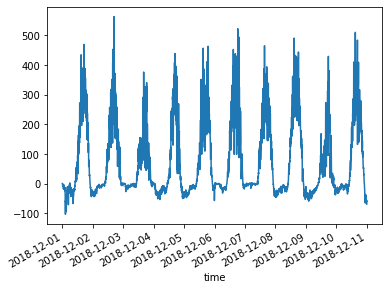

In [63]:
sh.plot()

In [66]:
lh[lh<-100] = np.NaN                                          # Set outliers to NaN

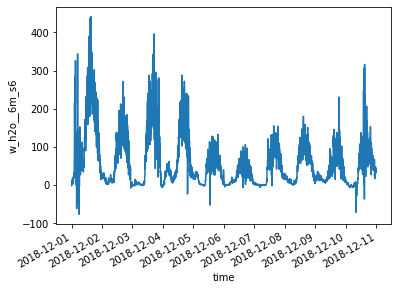

In [67]:
lh.plot()